### Take Home Assignment 01

In [1]:
# importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data

#### Question 01
To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

In [2]:
def reduce_intensity(image, intensity):
    """Reduce the number of intensity levels in an image."""

    # Check that intensity is between 1 and 8
    if intensity < 1 or intensity > 8:
        raise ValueError("Intensity must be between 1 and 8")
    
    # Calculate the number of intensity levels
    steps = (2**intensity)-1
    step = 255/ steps
 
    # Change the image to the new intensity levels
    reduced_image = np.round(image/step)*step
    
    return reduced_image

<Figure size 640x480 with 0 Axes>

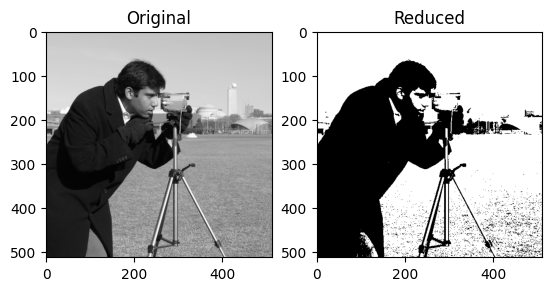

In [3]:
# load the image
image = data.camera()

# enter the intensity level
intensity = int(input("Enter the intensity level")) 

# reduce the intensity level
reduced = reduce_intensity(image, intensity) 

# plot
plt.gray()
f,arr = plt.subplots(1,2)
arr[0].set_title("Original")
arr[0].imshow(image)
arr[1].set_title("Reduced")
arr[1].imshow(reduced)

#### Question 02
Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the
process for a 10x10 neighborhood and again for a 20x20 neighborhood.

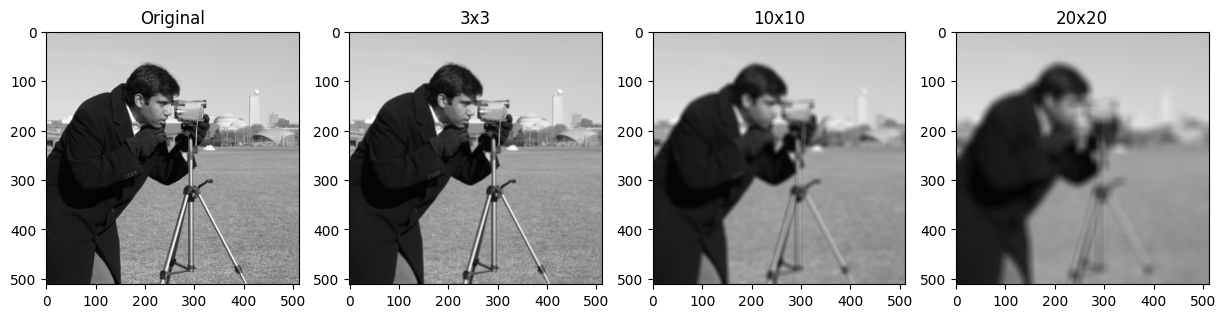

In [4]:
# load image
image = data.camera()
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# 3x3 simple spatial average
img3k = cv2.blur(image, (3, 3))

# 10x10 simple spatial average
img10k = cv2.blur(image, (10, 10))

# 20x20 simple spatial average
img20k = cv2.blur(image, (20, 20))

fig, axs = plt.subplots(1, 4, figsize=(15, 15))
axs[0].set_title("Original")
axs[0].imshow(image)

axs[1].set_title("3x3")
axs[1].imshow(img3k)

axs[2].set_title("10x10")
axs[2].imshow(img10k)

axs[3].set_title("20x20")
axs[3].imshow(img20k)

plt.show()


#### Question 03

Rotate an image by 45 and 90 degrees.

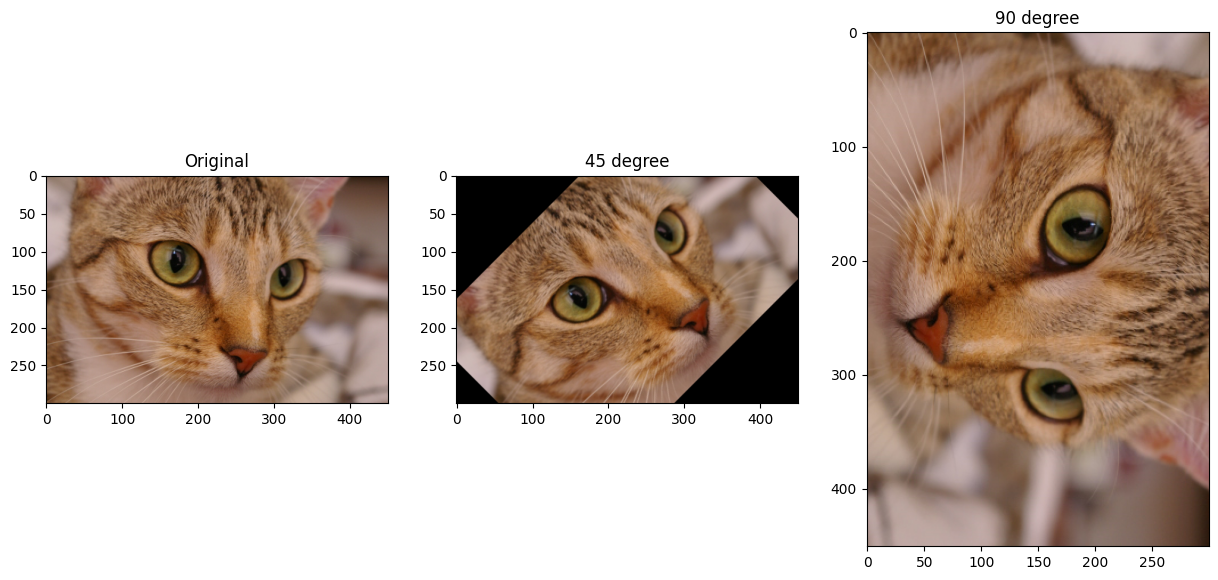

In [5]:
# Read in image
image = data.cat()

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

# Show original image
axs[0].set_title("Original")
axs[0].imshow(image)

# 45 degree rotation
x = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), 45, 1)
img45 = cv2.warpAffine(image, x, (image.shape[1], image.shape[0]))
axs[1].set_title("45 degree")
axs[1].imshow(img45)

# 90 degree rotation
img90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
axs[2].set_title("90 degree")
axs[2].imshow(img90)

plt.show()

#### Question 04

For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.

<Figure size 640x480 with 0 Axes>

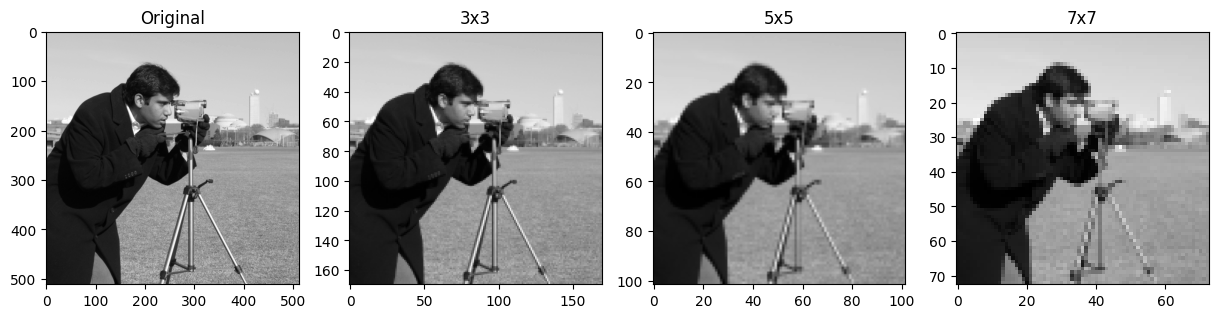

In [6]:
image = data.camera()
block_sizes = [3, 5, 7]

plt.gray()
f,arr = plt.subplots(1,4, figsize=(15, 15))
arr[0].set_title("Original")
arr[0].imshow(image)

def replace_image_average(img, factor):
    
    # Create a new empty image with shape (height/factor, width/factor)
    img_copy = np.zeros((img.shape[0]//factor, img.shape[1]//factor), dtype=np.uint8)

    # Define the block size
    kernel = (factor,factor)

    for y in range(0, img.shape[0]-kernel[0]+1, kernel[0]):
        for x in range(0, img.shape[1]-kernel[1]+1, kernel[1]):
            block = img[y:y+kernel[0], x:x+kernel[1]]
        
            # Calculate the average of all the pixels in the block
            avg = block.mean(axis=(0, 1))
        
            # Assign the average value to the corresponding position in the new image
            img_copy[y//factor][x//factor] = avg

    idx = block_sizes.index(factor)
    arr[idx+1].set_title(f"{factor}x{factor}")
    arr[idx+1].imshow(img_copy)


for block in block_sizes:
    processed = replace_image_average(image, block)
